In [81]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np
import ntpath
import os
import shutil
from glob import glob

def get_channel_name(data_list):
    """
    Extracts list of channel names from a filename list
    """
    names_list = [s.split('_')[0] for s in data_list]
    names_list = [s.split('\\')[-1] for s in names_list]
    return names_list

def convert_filename(filename):
    """
    Replaces Unicode characters in channel names, throws away spaces
    """
    #print(filename)
    filename_split = filename.rsplit('_', 1)
    name = filename_split[0].split('\\')[-1]
    if name == 'Новый':
        name = 'Novy'
    elif name == '5 канал':
        name = '5channel'
    elif name == 'K1':
        name = 'K1'
    elif name == 'K2':
        name = 'K2'
    elif name == 'TET':
        name = 'TET'
    elif name == 'АТР':
        name = 'ATR'
    elif name == 'Бигуди':
        name = 'Bigudi'
    elif name == 'Интер':
        name = 'Inter'
    elif name == 'КГТРК':
        name = 'KGTRK'
    elif name == 'Культура':
        name = 'Culture'
    elif name == 'МАТЧ':
        name = 'Match'
    elif name == 'НТВ':
        name = 'NTV'
    elif name == 'НТН':
        name = 'NTN'
    elif name == 'ОЦЕ':
        name = 'OCE'
    elif name == 'Первый Канал':
        name = 'Channel1Rus'
    elif name == 'Первый Канал Европа':
        name = 'Channel1RusEur'
    elif name == 'Первый национальный':
        name = 'FirstNationalUkr'
    elif name == 'Перший Діловий':
        name = 'FirstDilovyiUkr'
    elif name == 'Плюс Плюс':
        name = 'PlusPlus'
    elif name == 'Прямий':
        name = 'Priamyi'
    elif name == 'Піксель':
        name = 'Pixel'
    elif name == 'Рада':
        name = 'Rada'
    elif name == 'Рен-ТВ':
        name = 'RENTV'
    elif name == 'Россия-24':
        name = 'Russia24'
    elif name == 'СТБ':
        name = 'STB'
    elif name == 'СТС':
        name = 'STS'
    elif name == 'Солнце':
        name = 'Solntse'
    elif name == 'ТНТ':
        name = 'TNT'
    elif name == 'ТРК Украина':
        name = 'TRKUkraine'
    elif name == 'Телеканал Россия':
        name = 'RussiaTVChannel'
    elif name == 'Униан':
        name = 'Unian'
    name = name.replace(' ', '')
    return name + '_' + filename_split[1]

def create_SLM_labels(files_list):
    """
    Returns list of labels SLM/NONSLM from list of filenames
    """
    return [1 if name in ('ICTV', 'Novy', 'STB', 'M1', 'M2', 'OCE') else 0 for name in files_list]

def make_train_test_folders(path):
    data = np.array(glob(path + '/*'))
    #dog_files = np.array(data['filenames'])
    #dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    names_list = get_channel_name(data)
    #print(np.unique(names_list), len(np.unique(names_list)))
    labels_list = create_SLM_labels(names_list)
    #print(len(labels_list))
    if (not (os.path.isdir(path + '/train'))) or (not ((os.path.isdir(path + '/test')))):
        train_list, test_list, train_labels, test_labels = train_test_split(data, labels_list, test_size = .2)
        print(len(train_list), len(train_labels), len(test_list), len(test_labels))
        names_list = get_channel_name(test_list)
        print(len(np.unique(names_list)))
        os.makedirs(path + '/train')
        os.makedirs(path + '/test')
        for file in test_list:
            shutil.copy2(file, path + '/test/' + convert_filename(file))
        for file in train_list:
            shutil.copy2(file, path + '/train/' + convert_filename(file))
    else:
        train_list = shuffle(np.array(glob(path + '/train/*')))
        train_labels = create_SLM_labels(get_channel_name(train_list))
        test_list = shuffle(np.array(glob(path + '/test/*')))
        test_labels = create_SLM_labels(get_channel_name(test_list))
    #print(test_list[4], test_list[44], test_list[444], test_list[4444])
    #print(test_labels[4], test_labels[44], test_labels[444], test_labels[4444])
    #print(train_list[4], train_list[44], train_list[444], train_list[4444])
    #print(train_labels[4], train_labels[44], train_labels[444], train_labels[4444])
    #train_list = [s.replace('/', '\\') for s in train_list]
    #test_list = [s.replace('/', '\\') for s in train_list]
    
    #make length of lists with SLM and NON-SLM pics equal by throwing away extra NON-SLM pics
    #With TRAIN data
    train_labels = np.array(train_labels)
    #print(train_list[np.where(train_labels == 1)])
    tr_list_slm = np.array(train_list[np.where(train_labels == 1)])
    #print('SLM only list len:', len(tr_list_slm))
    tr_lab_slm = train_labels[np.where(train_labels == 1)]
    tr_list_non_slm = np.array(train_list[np.where(train_labels != 1)])
    #print('NON-SLM only list len:', len(tr_list_non_slm))
    tr_lab_non_slm = train_labels[np.where(train_labels != 1)]
    train_list   = np.concatenate([tr_list_slm, tr_list_non_slm[:len(tr_list_slm)]], axis = 0)
    train_list = shuffle(np.array(train_list))
    train_labels = np.array(create_SLM_labels(get_channel_name(train_list)))
    #With TEST data
    test_labels = np.array(test_labels)
    #print(train_list[np.where(train_labels == 1)])
    tst_list_slm = np.array(test_list[np.where(test_labels == 1)])
    #print('SLM only list len:', len(tr_list_slm))
    tst_lab_slm = test_labels[np.where(test_labels == 1)]
    tst_list_non_slm = np.array(test_list[np.where(test_labels != 1)])
    #print('NON-SLM only list len:', len(tr_list_non_slm))
    tst_lab_non_slm = test_labels[np.where(test_labels != 1)]
    test_list   = np.concatenate([tst_list_slm, tst_list_non_slm[:len(tst_list_slm)]], axis = 0)
    test_list = shuffle(np.array(test_list))
    test_labels = np.array(create_SLM_labels(get_channel_name(test_list)))
    #----------------------------
    
    #print('Train list len:', len(train_list), 'Train labels len:', len(train_labels))
    #print(train_list[np.where(train_labels == 1)])
    #print(train_list[np.where(train_labels != 1)])
    print('Training set len:', len(train_list))
    print('Test set len:', len(test_list))
    return data, train_list, test_list, train_labels, test_labels

In [82]:
dataset_path = 'D:\Screenshots'

train_files, train_list, test_list, train_labels, test_labels = make_train_test_folders(dataset_path)
new_names_list = get_channel_name(train_list)
print(np.unique(new_names_list), len(np.unique(new_names_list)))

Training set len: 9032
Test set len: 2968
['1+1' '2+2' '5channel' 'ATR' 'AlJazeera' 'BBCWorldNewsEurope' 'Bigudi'
 'BlackSeaTV' 'CNNInternational' 'Channel1Rus' 'Channel1RusEur' 'Culture'
 'DW' 'EXPLORE' 'EnterFilm' 'EuroNews' 'Eurosport' 'Eurosport2'
 'FirstDilovyiUkr' 'FirstNationalUkr' 'HISTORY' 'ICTV' 'Inter' 'K1' 'K2'
 'KGTRK' 'M1' 'M2' 'Match' 'Mega' 'MusicBOX' 'NATURE' 'NTN' 'NTV' 'News24'
 'Novy' 'OCE' 'OTV' 'Pixel' 'PlusPlus' 'Priamyi' 'RENTV' 'Rada' 'Russia24'
 'RussiaTVChannel' 'STB' 'STS' 'Solntse' 'TET' 'TNT' 'TRKUkraine' 'TV1000'
 'TVE' 'Unian' 'ZOOM'] 55


(60, 150, 3)


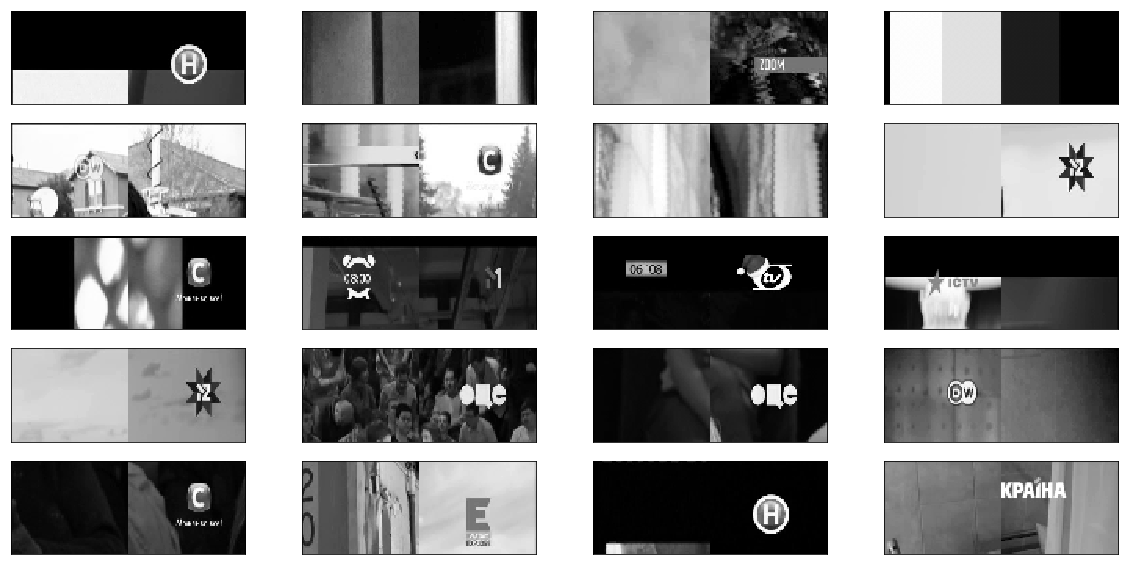

In [83]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def visualize_img(img_path, ax):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = cv2.cvtColor(img, cv2.RGB2GRAY)
    ax.imshow(img, cmap = 'gray')
    #ax.imshow(img)
    
fig = plt.figure(figsize=(20, 10))
addon = 1045
n_images = 20
for i in range(n_images):
    #print(train_list[addon + i])
    ax = fig.add_subplot(n_images / 4, 4, i + 1, xticks=[], yticks=[])
    visualize_img(train_list[addon + i], ax)
img = cv2.imread(train_list[1])
print(img.shape)

In [84]:
from keras.preprocessing import image
from tqdm import tqdm
import pickle
def img_to_tensor(img_path):
    # loads RGB image as PIL, convert to grayscale
    img = image.load_img(img_path, target_size=(60, 150), grayscale = True)
    # convert PIL.Image.Image type to 3D tensor with shape (60, 150, 1)
    x = image.img_to_array(img)
    #print(x.shape)
    # convert 3D tensor to 4D tensor with shape (1, 60, 150, 1) and return 4D tensor
    return np.expand_dims(x, axis=0)

def get_image_set(image_files):
    list_of_tensors = [img_to_tensor(img_path) for img_path in tqdm(image_files)]
    return np.vstack(list_of_tensors)

if os.path.isfile(dataset_path + '/X_train_dump.p'):
    print('Loading preprocessed TRAIN images from disk')
    X_train = pickle.load(open(dataset_path + '/X_train_dump.p', 'rb'))
    print('Done')
else:
    X_train = get_image_set(train_list).astype('float32') / 255
    print('Saving preprocessed TRAIN images')
    pickle.dump(X_train, open(dataset_path + '/X_train_dump.p', 'wb'))
    print('Complete')
    
if os.path.isfile(dataset_path + '/X_test_dump.p'):
    print('Loading preprocessed TEST images from disk')
    X_test = pickle.load(open(dataset_path + '/X_test_dump.p', 'rb'))
    print('Done')
else:
    X_test = get_image_set(test_list).astype('float32') / 255
    print('Saving preprocessed TEST images')
    pickle.dump(X_test, open(dataset_path + '/X_test_dump.p', 'wb'))
    print('Complete')


100%|██████████| 9032/9032 [03:05<00:00, 48.58it/s]


Saving preprocessed TRAIN images
Complete


100%|██████████| 2968/2968 [01:53<00:00, 26.25it/s]


Saving preprocessed TEST images
Complete


In [85]:
print(X_train.shape, X_test.shape)

(9032, 60, 150, 1) (2968, 60, 150, 1)


In [86]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(train_labels)
y_test = np_utils.to_categorical(test_labels)

In [87]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = (60, 150, 1)))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 128, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 60, 150, 32)       160       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 75, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 30, 75, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 30, 75, 64)        8256      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 37, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 15, 37, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 15, 37, 128)       32896     
__________

In [88]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [89]:
from keras.callbacks import ModelCheckpoint  

epochs = 40

checkpointer = ModelCheckpoint(filepath = dataset_path + '/weights_best_3layersCNN.hdf5', 
                               verbose = 1, save_best_only=True)

model.fit(X_train, y_train, 
          validation_split = .2,
          epochs = epochs, 
          batch_size = 32, 
          callbacks=[checkpointer], 
          verbose=2)

Train on 7225 samples, validate on 1807 samples
Epoch 1/40
Epoch 00001: val_loss improved from inf to 0.65248, saving model to D:\Screenshots/weights_best_3layersCNN.hdf5
 - 105s - loss: 0.6736 - acc: 0.5895 - val_loss: 0.6525 - val_acc: 0.6480
Epoch 2/40
Epoch 00002: val_loss improved from 0.65248 to 0.64271, saving model to D:\Screenshots/weights_best_3layersCNN.hdf5
 - 103s - loss: 0.6496 - acc: 0.6397 - val_loss: 0.6427 - val_acc: 0.6552
Epoch 3/40
Epoch 00003: val_loss improved from 0.64271 to 0.60979, saving model to D:\Screenshots/weights_best_3layersCNN.hdf5
 - 102s - loss: 0.6365 - acc: 0.6612 - val_loss: 0.6098 - val_acc: 0.6967
Epoch 4/40
Epoch 00004: val_loss improved from 0.60979 to 0.60091, saving model to D:\Screenshots/weights_best_3layersCNN.hdf5
 - 107s - loss: 0.6203 - acc: 0.6772 - val_loss: 0.6009 - val_acc: 0.7244
Epoch 5/40
Epoch 00005: val_loss improved from 0.60091 to 0.56052, saving model to D:\Screenshots/weights_best_3layersCNN.hdf5
 - 106s - loss: 0.5955 - 

In [90]:
model.load_weights(dataset_path + '/weights_best_3layersCNN.hdf5')

In [93]:
print(model.metrics_names)
print("Accuracy on a test set: {0:.2f}".format(model.evaluate(X_test, y_test, verbose = 2)[1]))

['loss', 'acc']
Accuracy on a test set: 0.93


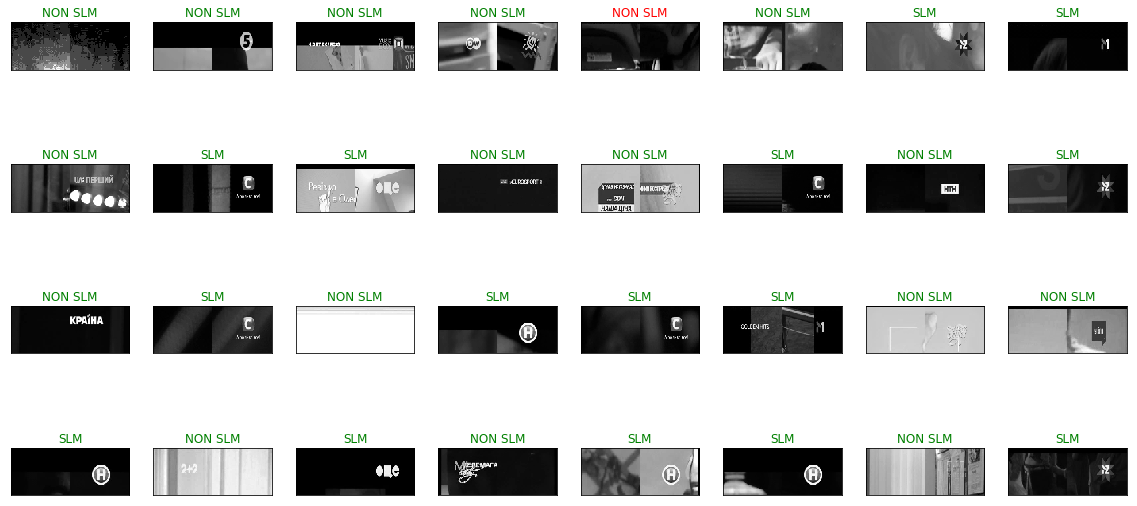

In [96]:
#prediction pipeline
fig = plt.figure(figsize=(20, 10))
y_hat = model.predict(X_test)
images_to_show = 32
for i, idx in enumerate(np.random.choice(X_test.shape[0], size = images_to_show, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]), cmap = 'gray')
    pred_idx = np.argmax(y_hat[idx])
    true_idx = test_labels[idx]
    ax.set_title("{}".format(("SLM" if pred_idx == 1 else "NON SLM")), color = ("green" if pred_idx == true_idx else "red"))